# Kaggle Titanic Project

## Objective
---

You'll be competing in Kaggle's [Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic) Competition. You can download the datasets, and read the requirements of the competition using the associated link.<br>

### Requirements
---
* **Submissions:**
    1. Screenshot of conforimation of submission to Kaggle
    2. Your completed notebook, following the associated outline as necessary below.
        * Clearly structure your notebook, try to walk the reader along your experiment by making use           of clean code, efficient use of outputs, effective visualizations, and basic Markdown                 syntax to document your code.

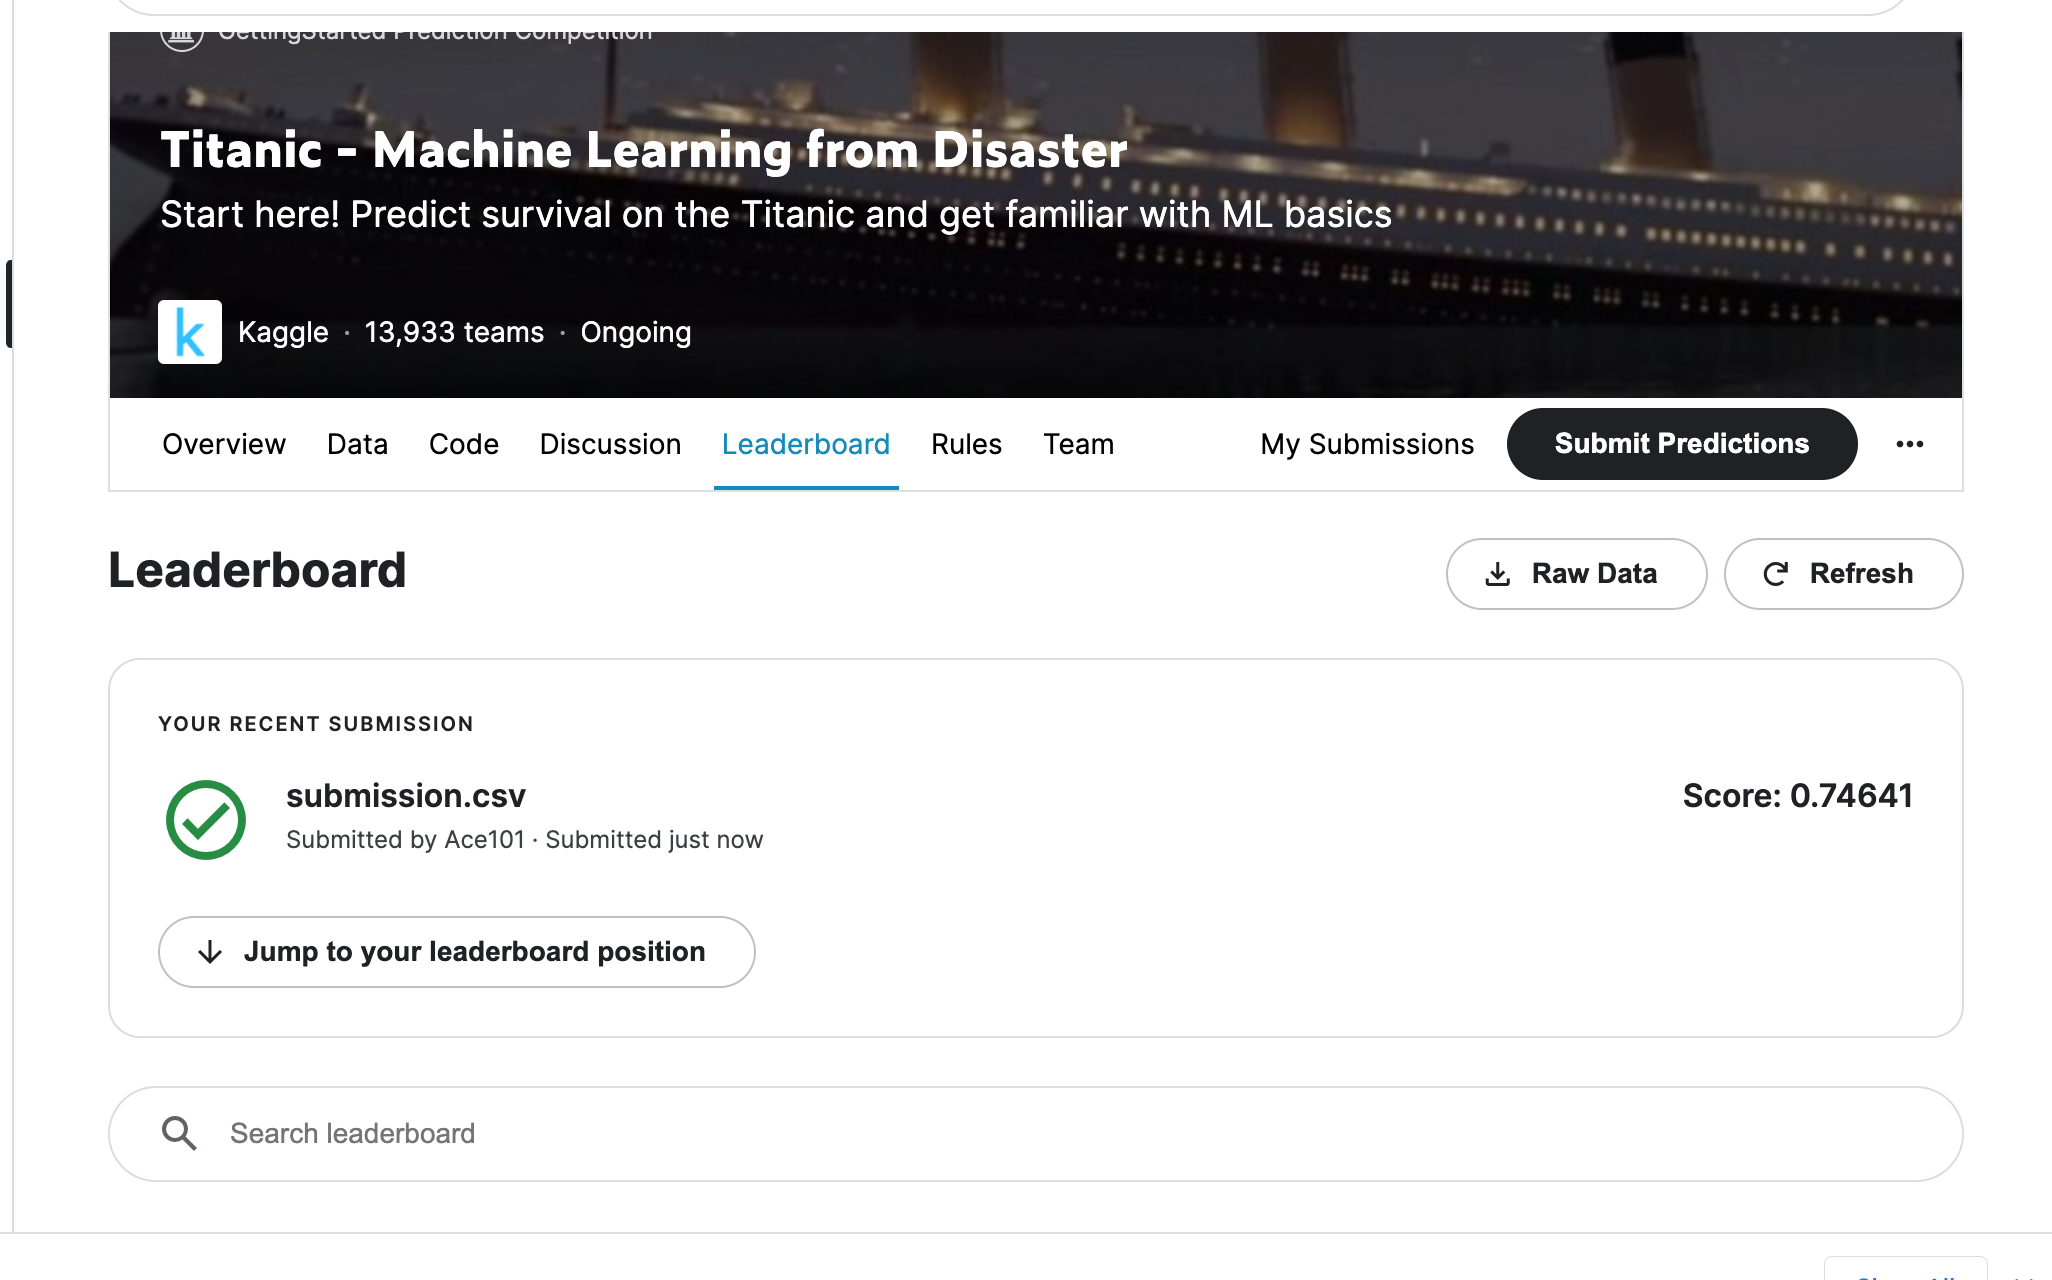## Example
---
<br>


## Title
#### Antone Smith

### Problem Definition
what sorts of people were more likely to survive?

### Sourcing Data
Quickly describe the content of the data, citing the source, and explaining why you believe this dataset can be used to solve your problem.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd # data processing, CSV file
import matplotlib.pyplot as plt 
import matplotlib_inline
import numpy as np


In [ ]:
# Load training data from its source format into a pandas dataframe
path = "/content/drive/MyDrive/data/titanic_data/train.csv"
raw_data = pd.read_csv(path)

In [ ]:
# Load testing data from its source format into a pandas dataframe
path_2 = "/content/drive/MyDrive/data/titanic_data/test.csv"
testing_data = pd.read_csv(path_2)

In [ ]:
#newly added for submission
raw_test = pd.read_csv('/content/drive/MyDrive/data/titanic_data/test.csv')

In [ ]:
# Quick overview of data using pandas methods
raw_data.shape

(891, 12)

In [ ]:
testing_data.shape

(418, 11)

In [ ]:
 #checking to see what columns I can explore in dataframe

raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#checking null values in data
raw_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
testing_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

After looking at the train and testing data set, we can see that both datasets have null values in both the Age and cabin column.

But the testing dataset has an additional null value in the fare column while training has a nulls in Embarked

Previously analysising the shape of the data the cabin column should be dropped considering the null values takes up more than half on that column.

Also I will drop the Name column because for my analysis Passenger names are not of value.



We will repair the other null values

In [ ]:
#checking to correlation between columns
raw_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
raw_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


####By doing a quick EDA on the data we can see that the corralation between passengers survived compared to the other columns are fairly low.



### Data Cleaning
This section should contain all of your data cleaning. Document your approach in markdown as such:

In [ ]:
train_data = raw_data

In [ ]:
# We will need this at the end for our submission
test_id = testing_data.copy()

In [ ]:
test_id

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
#drop duplicate id
#drop Name & Cabin
train_data.drop(['PassengerId', 'Name', 'Cabin', 'Embarked', 'Ticket'], axis= 1, inplace = True)
testing_data.drop(['PassengerId', 'Name', 'Cabin', 'Embarked', 'Ticket'], axis=1, inplace=True)

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


SimpleImputer is a scikit-learn class which is helpful in handling the missing data in the predictive model dataset. It replaces the NaN values with a specified placeholder. strategy : The data which will replace the NaN values from the dataset


If “mean”, then replace missing values using the mean along each column. Can only be used with numeric data. This also the default.

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
filler = ["Age"]
imputer = SimpleImputer()

In [ ]:
imputer.fit(raw_data[filler])

SimpleImputer()

In [ ]:
train_data[filler] = imputer.fit_transform(raw_data[filler])
testing_data[filler] = imputer.fit_transform(testing_data[filler])

In [ ]:
#make placeholder for null value in testing set fare colum
fare_col = ['Fare']
fare_imputer = SimpleImputer()
fare_imputer.fit(testing_data[fare_col])
testing_data[fare_col] = fare_imputer.fit_transform(testing_data[fare_col])


In [ ]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [ ]:
testing_data.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

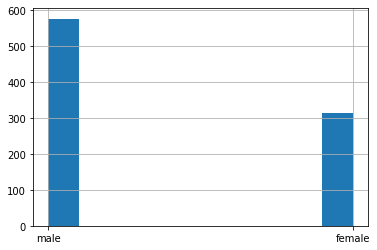

In [ ]:
train_data['Sex'].hist()

In [ ]:
#checking the count
train_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

the number of male cells heavily outweight the number of  female cells within out dataset. We may have to use a sampling technique

In [ ]:
# Execute cleaning

In [ ]:
# assign 0 to male and 1 to female
Sex = {'Sex': {'male': 0, 'female': 1}}

train_data.replace(Sex, inplace=True)
testing_data.replace(Sex, inplace=True)

In [ ]:
train_data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500
Sex,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333
Age,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000


### Exploratory Data Analysis


####You can now see Sex appear in our correlation

#### Now that my target variable is represent by numerical values, I'll look at the cooralation on seaborn

In [ ]:
import seaborn as sns

Text(0.5, 1.0, 'Coorelations in Titanic Dataframe')

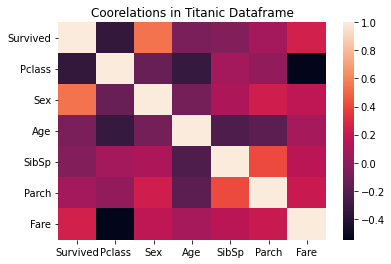

In [ ]:
corr = train_data.corr()
sns.heatmap(corr)
plt.title('Coorelations in Titanic Dataframe')


Below I used a pairplot visualization

A pairs plot allows us to see both distribution of single variables and relationships between two variables . Pair plots are a great method to identify trends for follow-up analysis and, fortunately.


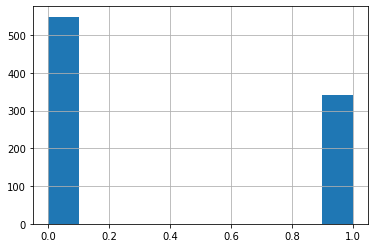

In [ ]:
train_data['Survived'].hist()

**EVERY VISUALIZATION REQUIRES AN ASSOCIATED DECSRIPTION** *(in addition to titles, axis labels, specified units of measurements, and legend if necessary.)*

### Data Processing
Here you prepare your data for training and testing. You'll select what predictors you want to include in your training and what you want to leave out, again providing an explanation. These can be varibales you've identified having little coorelation to your target variable.



*   Scaling
*   Creating subsets



In [ ]:
corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Survived to Fare
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  7 non-null      float64
 1   Pclass    7 non-null      float64
 2   Sex       7 non-null      float64
 3   Age       7 non-null      float64
 4   SibSp     7 non-null      float64
 5   Parch     7 non-null      float64
 6   Fare      7 non-null      float64
dtypes: float64(7)
memory usage: 748.0+ bytes


### ML Model
Implementing a cross validation technique, train and test your model with you preprocessed data.

Gaussian Naive Bayes supports continuous valued features 

In [ ]:
x , y = train_data.drop(['Survived'], axis=1), train_data['Survived']
x_train , y_train = x, y


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size =0.2, random_state= 36)
y=y.astype('int') 

In [ ]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score

In [ ]:
gnb = GaussianNB()

gnb.fit(x_train, y_train)

y_pred = gnb.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8212290502793296

In [ ]:
# Cross validation and performance metrics

scores = []

cv = 100

for i in range(cv):
    
    gnb = GaussianNB()
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

    gnb.fit(x_train, y_train)

    y_pred = gnb.predict(x_test)

    acc = accuracy_score(y_test, y_pred)

    scores.append(acc)
    
np.mean(scores)

0.7903351955307264

Our overall accuracy looks to be approx: 78%

Stratified K-Fold is an enhanced version of K-Fold cross-validation which is mainly used for imbalanced datasets. Just like K-fold, the whole dataset is divided into K-folds of equal size.

But in this technique, each fold will have the same ratio of instances of target variable as in the whole datasets.

In [ ]:
prediction = gnb.predict(testing_data)

In [ ]:
len(prediction)

418

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [ ]:

x , y = train_data.drop(['Survived'], axis=1), train_data['Survived']
x_train , y_train = x, y

# Create  classifier object.
logreg=LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size =0.2, random_state= 36)
logreg.fit(x_train,y_train)
predict=logreg.predict(x_test)


In [ ]:
print(f"Accuracy score on training set is {accuracy_score(logreg.predict(x_train),y_train)}")
print(f'Average Cross Validation score {accuracy_score(predict,y_test)}')

Accuracy score on training set is 0.7991573033707865
Average Cross Validation score 0.7932960893854749


Our overall accuracy looks to be approx: 79%

### Model Evaluation
Using the metrics gathered when training and testing your model, below is a confusion matrix that visualize the performance of our model.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# Create a confision matrix using our true values and predicted values
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[72, 33],
       [39, 35]])

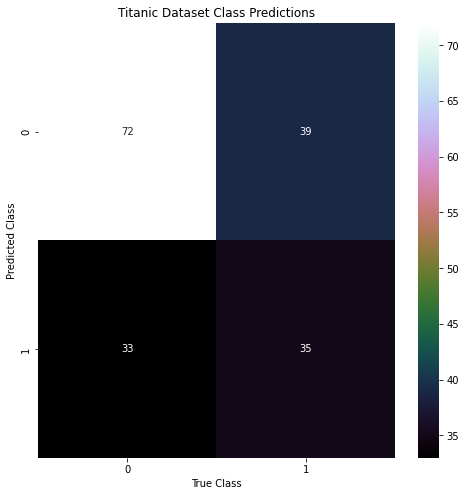

In [ ]:
plt.figure(figsize=(8,8))
# Transpose the confusion matrix 
sns.heatmap(conf_mat.T, annot=True, cbar=True, cmap='cubehelix')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.title('Titanic Dataset Class Predictions');

---
<br>

### Conclusion
The sex of the passanger on the titanic also has a great determination factor of the likelihood of survival.

In [ ]:
print(test_id.values)

[[892 3 'Kelly, Mr. James' ... 7.8292 nan 'Q']
 [893 3 'Wilkes, Mrs. James (Ellen Needs)' ... 7.0 nan 'S']
 [894 2 'Myles, Mr. Thomas Francis' ... 9.6875 nan 'Q']
 ...
 [1307 3 'Saether, Mr. Simon Sivertsen' ... 7.25 nan 'S']
 [1308 3 'Ware, Mr. Frederick' ... 8.05 nan 'S']
 [1309 3 'Peter, Master. Michael J' ... 22.3583 nan 'C']]


In [ ]:
submission_data = {'PassengerId':test_id.PassengerId,"Survived":prediction}

In [ ]:
len(prediction)

418

In [ ]:
submit = pd.DataFrame(submission_data)

In [ ]:
submit

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
from google.colab import files


In [ ]:
submit.to_csv('submission.csv', index=False)

In [ ]:
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>